In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

we will work with titanic dataset

In [197]:
train = pd.read_csv('/Users/cenkerarin/ml_test/datasets/titanic/train.csv')
test = pd.read_csv('/Users/cenkerarin/ml_test/datasets/titanic/test.csv')

In [198]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

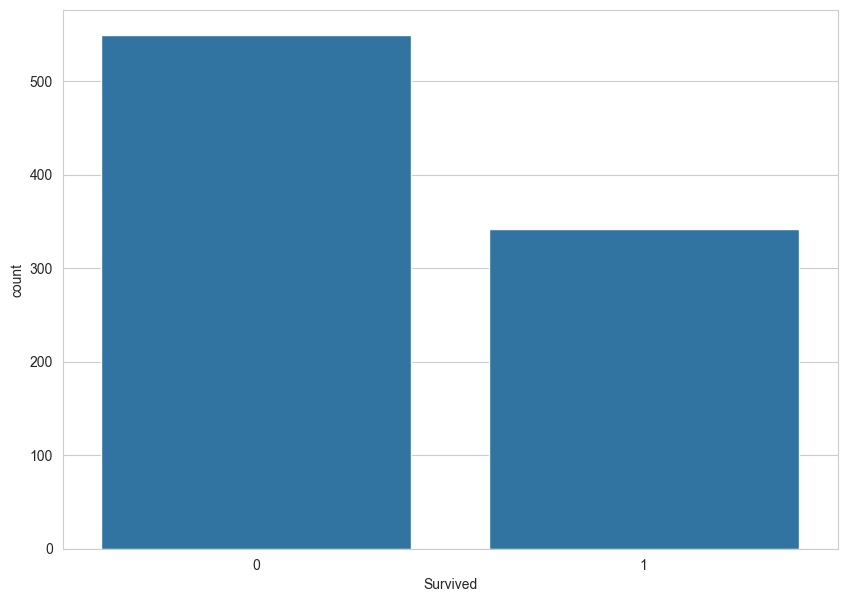

In [199]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

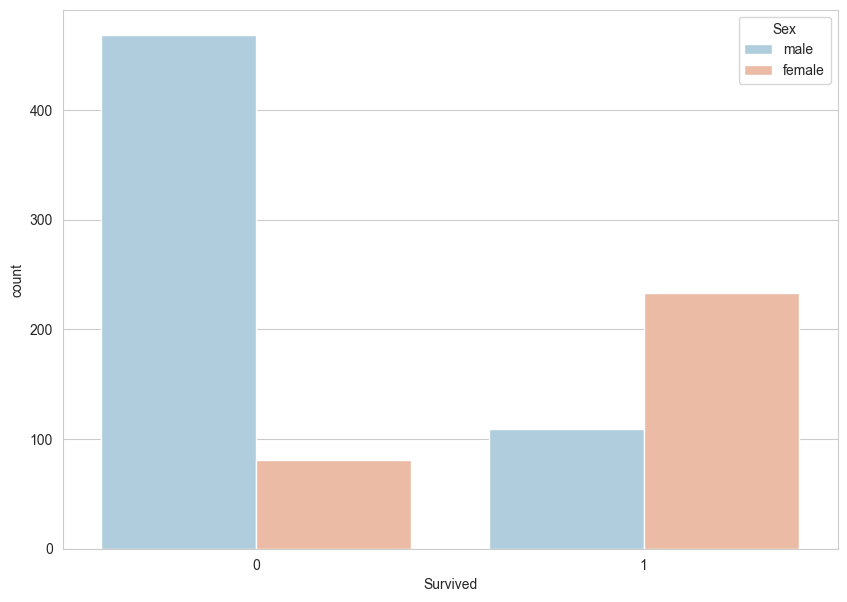

In [200]:
plt.figure(figsize=(10, 7))
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

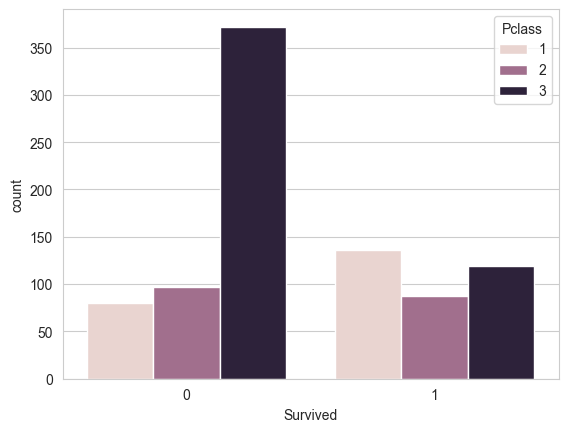

In [201]:
sns.countplot(x='Survived',hue='Pclass',data=train)

<Axes: xlabel='Survived', ylabel='count'>

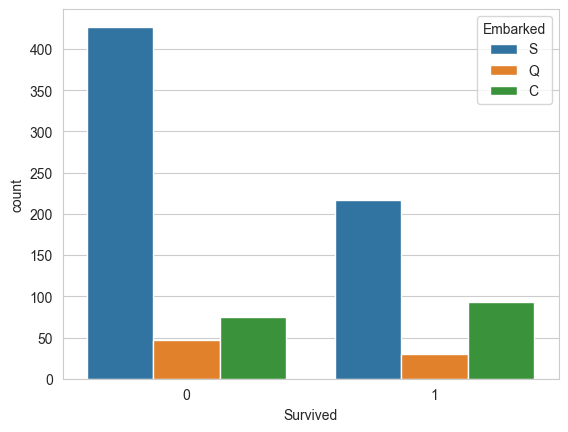

In [202]:
sns.countplot(x='Survived',hue='Embarked',data=train)

<Axes: xlabel='Age', ylabel='Count'>

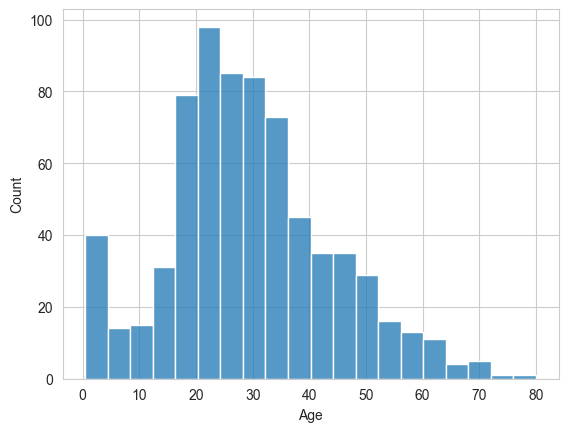

In [203]:
sns.histplot(x='Age',data=train)

<Axes: xlabel='Survived', ylabel='count'>

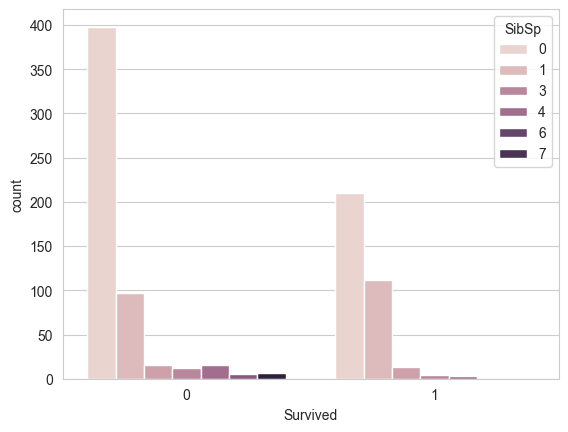

In [204]:
sns.countplot(x='Survived',hue='SibSp',data=train)

<Axes: xlabel='Fare', ylabel='Count'>

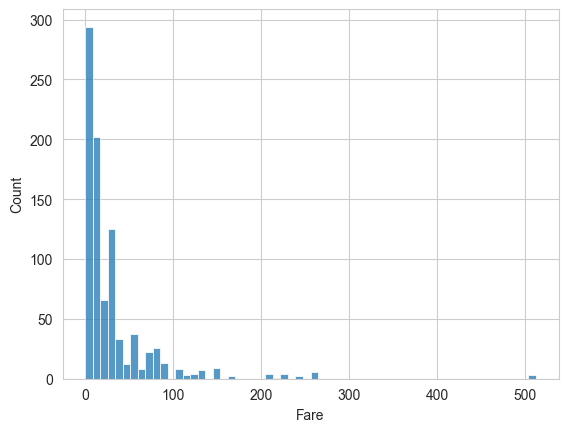

In [205]:
sns.histplot(x='Fare',data=train)

In [206]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

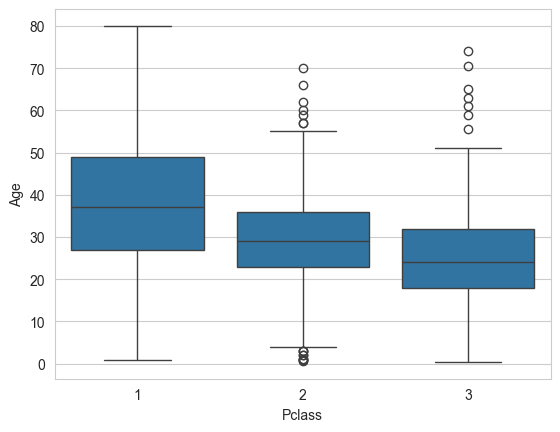

In [207]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [208]:
train.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [209]:
for pclass in [1,2,3]:
    age_median = train[train['Pclass']==pclass]['Age'].median()
    train.loc[(train['Age'].isnull()) & (train['Pclass']==pclass), 'Age'] = age_median

In [210]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [211]:
train['has_cabin_letter'] = train['Cabin'].notna().astype(int)

In [212]:
train.drop('Cabin',axis=1,inplace=True)

In [213]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Name              891 non-null    object 
 4   Sex               891 non-null    object 
 5   Age               891 non-null    float64
 6   SibSp             891 non-null    int64  
 7   Parch             891 non-null    int64  
 8   Ticket            891 non-null    object 
 9   Fare              891 non-null    float64
 10  Embarked          889 non-null    object 
 11  has_cabin_letter  891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [214]:
train.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Embarked            2
has_cabin_letter    0
dtype: int64

In [215]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [216]:
train['ticket_has_letter'] = train['Ticket'].str.contains('[A-Za-z]').astype(int)
train.drop('Ticket',axis=1,inplace=True)

In [217]:
train.drop('Name',axis=1,inplace=True)

In [218]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin_letter,ticket_has_letter
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0


In [219]:
most_common_embarked = train['Embarked'].mode()[0]
train['Embarked'].fillna(most_common_embarked, inplace=True)

/var/folders/sd/mp8h6dhx24d94wlc3ddbb2500000gn/T/ipykernel_64276/1797507870.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(most_common_embarked, inplace=True)


In [220]:
train.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Sex                  0
Age                  0
SibSp                0
Parch                0
Fare                 0
Embarked             0
has_cabin_letter     0
ticket_has_letter    0
dtype: int64

In [221]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has_cabin_letter,ticket_has_letter
0,1,0,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,1
2,3,1,3,female,26.0,0,0,7.9250,S,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0
4,5,0,3,male,35.0,0,0,8.0500,S,0,0


In [222]:
from sklearn.preprocessing import OneHotEncoder

In [223]:
# One-hot encode categorical variables
categorical_columns = ['Sex', 'Embarked',]

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids dummy trap

# Fit and transform
encoded = encoder.fit_transform(train[categorical_columns])

# Get feature names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Merge with original df
final_df = pd.concat([train.drop(columns=categorical_columns), encoded_df], axis=1)


In [224]:
final_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,has_cabin_letter,ticket_has_letter,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,1,1,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0,1,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,1,0,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,0,0,1.0,0.0,1.0


In [225]:
target = final_df['Survived']
X = final_df.drop(['Survived','PassengerId'],axis=1)

In [226]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

In [227]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [228]:
# Make predictions on test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy score
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

print("\nClassification Report")
print(classification_report(y_test, y_pred))


Accuracy: 0.821

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



----

clean the test data aswell

In [229]:

# Fill missing Age values with median based on Pclass
for pclass in test['Pclass'].unique():
    median_age = test[test['Pclass'] == pclass]['Age'].median()
    test.loc[(test['Pclass'] == pclass) & (test['Age'].isnull()), 'Age'] = median_age

# Create Cabin_letter feature
test['has_cabin_letter'] = test['Cabin'].notna().astype(int)

# Create ticket_has_letter feature
def ticket_has_letter(ticket):
    if any(char.isalpha() for char in ticket):
        return 1
    else:
        return 0

test['ticket_has_letter'] = test['Ticket'].apply(ticket_has_letter)

# Fill missing Embarked values with the most common value
most_common_embarked = test['Embarked'].mode()[0] if not test['Embarked'].mode().empty else 'S'
test['Embarked'].fillna(most_common_embarked, inplace=True)

# Fill missing Fare values with median
test['Fare'].fillna(test['Fare'].median(), inplace=True)

# Drop unnecessary columns
test = test.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Convert categorical variables to dummy variables
test_encoded = pd.get_dummies(test, columns=['Sex', 'Embarked'], drop_first=True)

print("Test data shape after preprocessing:", test_encoded.shape)
print("\nMissing values in test data:")
print(test_encoded.isnull().sum())


Test data shape after preprocessing: (418, 11)

Missing values in test data:
PassengerId          0
Pclass               0
Age                  0
SibSp                0
Parch                0
Fare                 0
has_cabin_letter     0
ticket_has_letter    0
Sex_male             0
Embarked_Q           0
Embarked_S           0
dtype: int64


/var/folders/sd/mp8h6dhx24d94wlc3ddbb2500000gn/T/ipykernel_64276/1440655484.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['Embarked'].fillna(most_common_embarked, inplace=True)
/var/folders/sd/mp8h6dhx24d94wlc3ddbb2500000gn/T/ipykernel_64276/1440655484.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [230]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg_final = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg_final.fit(X, target)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [231]:
y_pred_final = log_reg_final.predict(test_encoded.drop('PassengerId',axis=1))

In [234]:
# Create submission dataframe
submission = pd.DataFrame({
    'PassengerId': test_encoded['PassengerId'],
    'Survived': y_pred_final
})

print("Submission dataframe:")
print(submission.head())
print(f"\nSubmission shape: {submission.shape}")


Submission dataframe:
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

Submission shape: (418, 2)


In [235]:
submission.to_csv('submission.csv', index=False)